A gambler starts with wealth k dollars and has a target n > k. He bets $1 in each round and
wins each round with probability p. Let Xn denote the gambler’s wealth at time step n, n ≥ 0
with X0 = k. Let the stopping time for this process {Xn : n ≥ 0} be defined as the time step
at which the gambler wins or is ruined (whichever comes first). For a given (k, n, p) triple,


• Plot five sample paths till the gambler reaches the target or is ruined (whichever comes
first).


• Using Monte Carlo simulation over 104 trials, estimate the probability that the gambler
wins (reaches the target before being ruined).


• Plot the value of the stopping time for 100 of the iterations in which the gambler wins
and 100 iterations in which the gambler is ruined.


Default value of (k, n, p) = (40, 60, 0.5).




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def simulate_gamblers_ruin_vanilla_version(start=40 , target = 60 , p = 0.5 , rng = np.random.default_rng(seed=42)):
  x = start
  path = [x]
  t = 0
  while x > 0 and x < target:
    if rng.random() < p:
      x += 1
    else:
      x -= 1

    path.append(x)
    t += 1
  return t , x , path



In [3]:
# initialize all parameters

start_k = 40
target_n = 60
p = 0.5
rng = np.random.default_rng(seed=42)
num_monte_carlo_trails = 10000

t,x,path = simulate_gamblers_ruin_vanilla_version(start_k,target_n,p,rng)
# print(t,x,path)

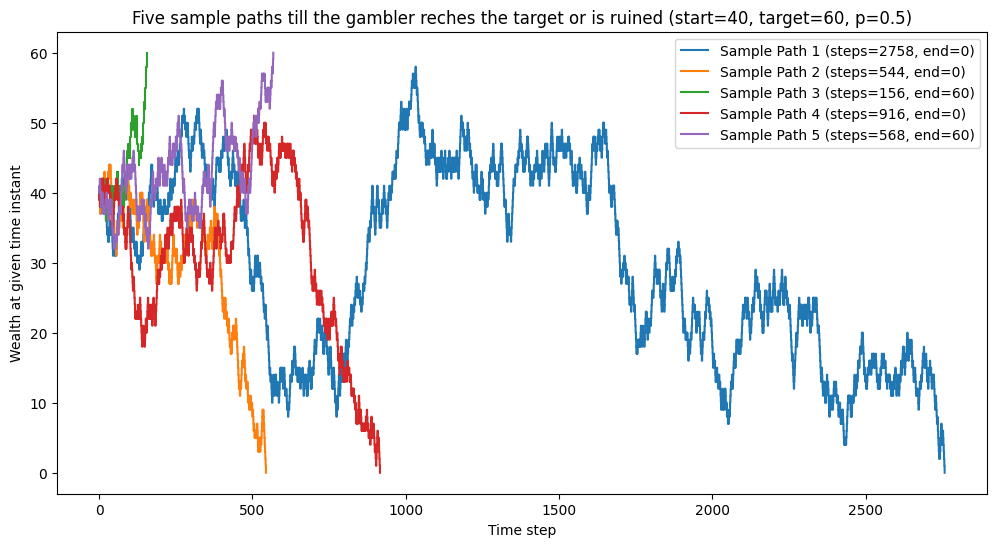

In [5]:
# Plot first 5 sample paths till the gambler reaches the target or is ruined

sample_paths = []
for i in range(5):
  t, x_final , path = simulate_gamblers_ruin_vanilla_version(start_k,target_n,p,rng)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Five sample paths till the gambler reches the target or is ruined (start={start_k}, target={target_n}, p={p})')
plt.legend()
plt.grid(False)
plt.show()


In [6]:
# Monte Carlo simulation to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = simulate_gamblers_ruin_vanilla_version(start_k,target_n,p,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails

print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# theoretical probability
if(np.isclose(p,0.5)):
  theoretical_prob = start_k/target_n
else:
  q = 1-p
  theoretical_prob = (1 - (q/p)**start_k) / (1 - (q/p)**target_n)

print(f"Theoretical probability = {theoretical_prob:.4f}")




Monte Carlo estimate (10^4 trials): P(win) ≈ 0.6727
Time taken: 3.47s
Theoretical probability = 0.6667


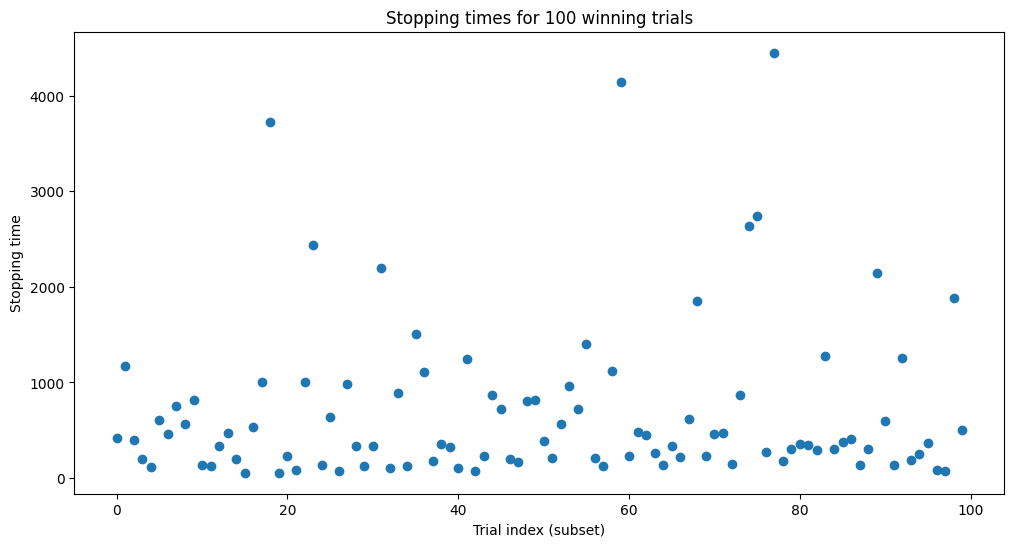

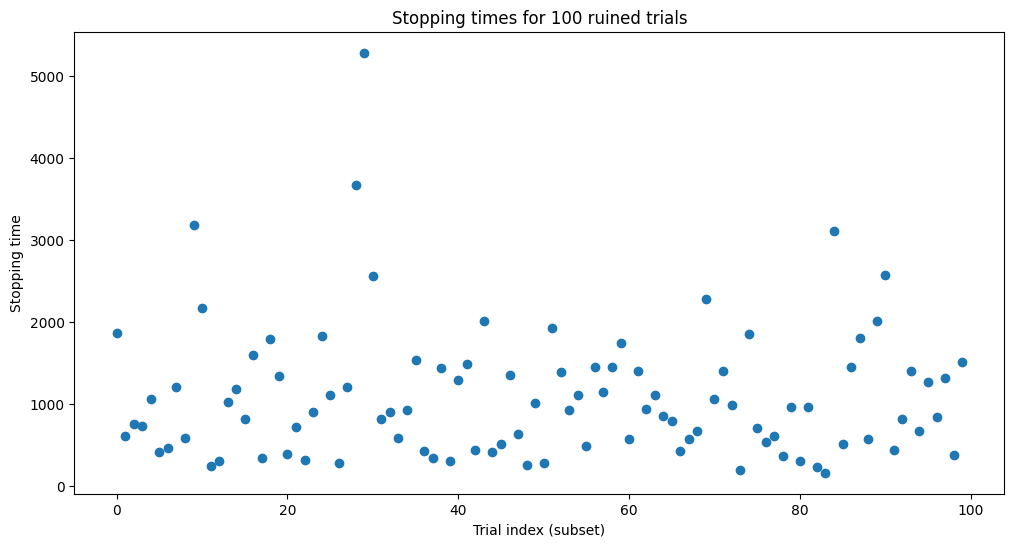

In [7]:
# Plot stopping times for 100 winning and 100 ruined trails

rng2 = np.random.default_rng(seed=123)

win_indices = np.where(wins_mask)[0]
loss_indices = np.where(~wins_mask)[0]

# pick upto 100 from each

chosen_wins = rng2.choice(win_indices,size=min(100,len(win_indices)),replace=False)
chosen_losses = rng2.choice(loss_indices,size=min(100,len(loss_indices)),replace=False)

# plot stopping time for wins

plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(chosen_wins)) , stop_times[chosen_wins])
plt.xlabel('Trial index (subset)')
plt.ylabel('Stopping time')
plt.title('Stopping times for 100 winning trials')
plt.grid(False)
plt.show()


# plot stopping times for 100 ruins

plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(chosen_losses)) , stop_times[chosen_losses])
plt.xlabel('Trial index (subset)')
plt.ylabel('Stopping time')
plt.title('Stopping times for 100 ruined trials')
plt.grid(False)
plt.show()


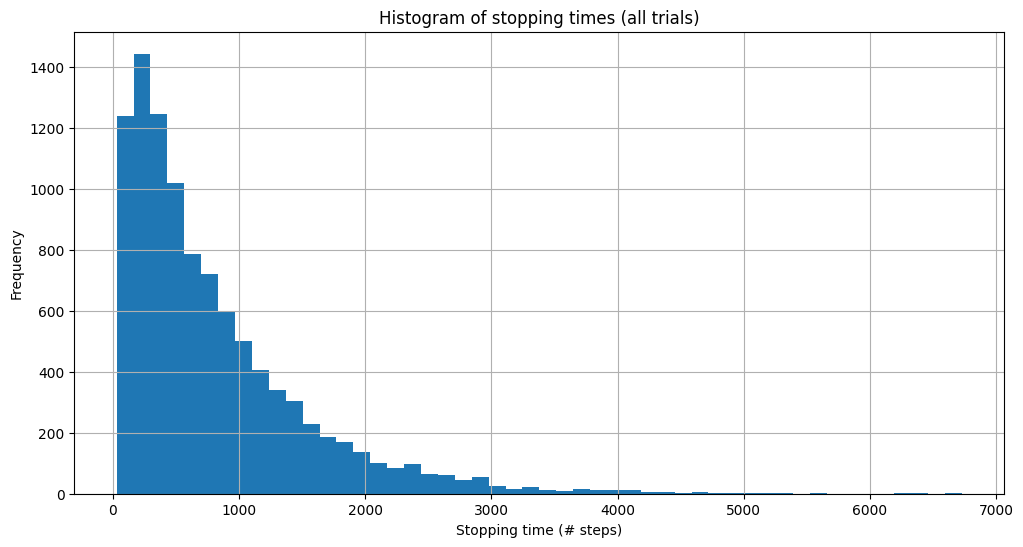

In [8]:
# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times (all trials)')
plt.grid(True)
plt.show()